In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#data exploration
df=pd.read_csv("Airbnb_data - airbnb_data.csv")
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117      2.0   2.0  
4                                                NaN   20009      0.0   1.0  

[5 rows x 29 columns]

In [3]:
#basic information and statistics about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [4]:
#datapreprocessing
#to check null values
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

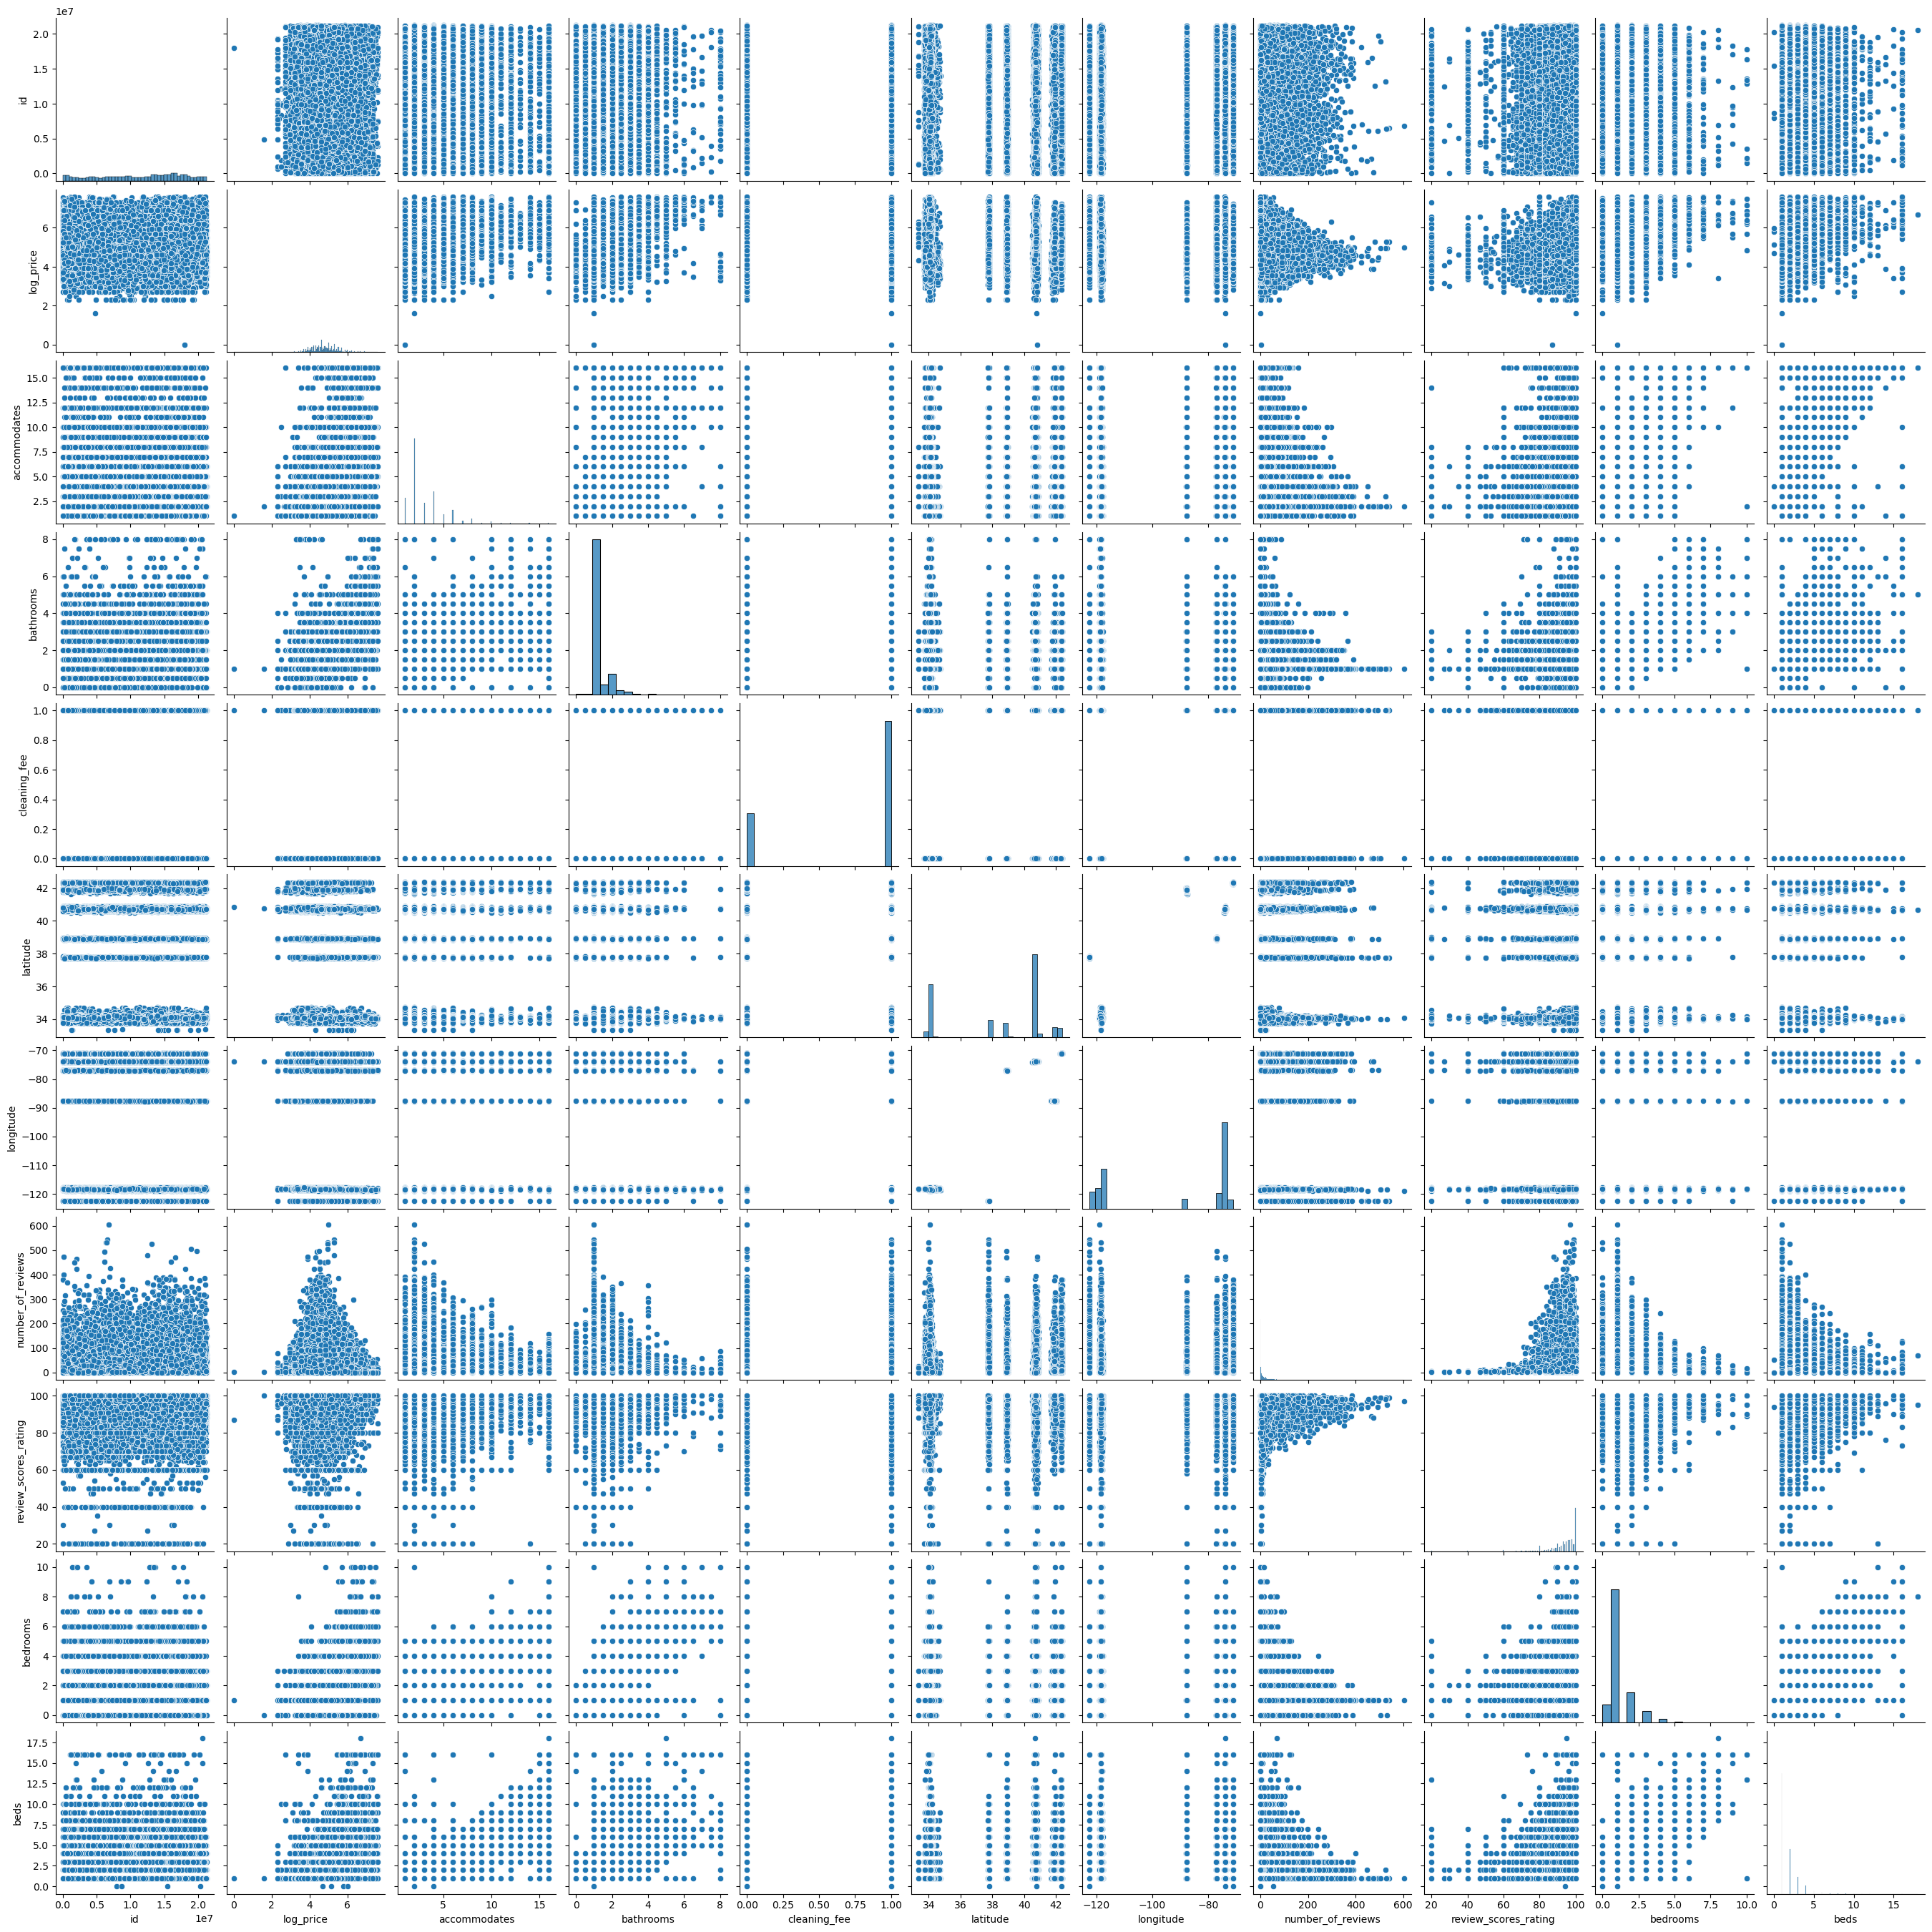

In [6]:
#visualising relationships between variables
sns.pairplot(df)
plt.show()

In [7]:
#identifying categorical columns
cat_col = df.select_dtypes(include=["object"]).columns
cat_col

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

In [8]:
#encoding categorical columns
encoder=LabelEncoder()
for col in cat_col:
    df[col]=encoder.fit_transform(df[col])

In [9]:
#identifying numerical columns
num_col=df.select_dtypes(include=["number"]).columns
num_col

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [10]:
#to check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  int32  
 3   room_type               74111 non-null  int32  
 4   amenities               74111 non-null  int32  
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  int32  
 8   cancellation_policy     74111 non-null  int32  
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  int32  
 11  description             74111 non-null  int32  
 12  first_review            74111 non-null  int32  
 13  host_has_profile_pic    74111 non-null  int32  
 14  host_identity_verified  74111 non-null

In [11]:
df[num_col] = df[num_col].fillna(df[num_col].median())
df[num_col]


id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0       6142             3   
1       6304928   5.129899              0          0       6269             7   
2       7919400   4.976734              0          0      21345             5   
3      13418779   6.620073             17          0      38854             4   
4       3808709   4.744932              0          0      55413             2   
...         ...        ...            ...        ...        ...           ...   
74106  14549287   4.605170              0          1      67121             1   
74107  13281809   5.043425              0          0      38652             4   
74108  18688039   5.220356              0          0      61276             5   
74109  17045948   5.273000              0          0      48796             2   
74110   3534845   4.852030              2          0      65022             4   

       bathrooms  bed_type  cancellation_policy  city  ...   latitude  \
0            1.0         4                    2     4  ...  40.696524   
1            1.0         4                    2     4  ...  40.766115   
2            1.0         4                    1     4  ...  40.808110   
3            1.0         4                    0     5  ...  37.772004   
4            1.0         4                    1     2  ...  38.925627   
...          ...       ...                  ...   ...  ...        ...   
74106        1.0         4                    0     4  ...  40.709025   
74107        2.0         4                    1     3  ...  33.871549   
74108        1.0         4                    1     4  ...  40.706749   
74109        1.0         4                    2     4  ...  40.738535   
74110        1.0         4                    1     3  ...  33.761096   

        longitude   name  neighbourhood  number_of_reviews  \
0      -73.991617  10375             77                  2   
1      -73.989040  65616            252                  6   
2      -73.943756  66341            247                 10   
3     -122.431619   9296            325                  0   
4      -77.034596  31994            119                  4   
...           ...    ...            ...                ...   
74106  -73.939405  72319            605                  0   
74107 -118.396053  59843            255                 16   
74108  -73.942377  43628            605                 43   
74109  -74.000157  26369            592                  0   
74110 -118.192409  22108            319                205   

       review_scores_rating  thumbnail_url  zipcode  bedrooms  beds  
0                     100.0          32398      105       1.0   1.0  
1                      93.0          16220       19       3.0   3.0  
2                      92.0          32852       26       1.0   3.0  
3                      96.0          33692      650       2.0   2.0  
4                      40.0          65883      210       0.0   1.0  
...                     ...            ...      ...       ...   ...  
74106                  96.0          25229      109       1.0   1.0  
74107                  93.0          13695      425       2.0   4.0  
74108                  94.0          37484      109       2.0   2.0  
74109                  96.0          51019       12       0.0   2.0  
74110                  96.0          10902      487       1.0   2.0  

[74111 rows x 28 columns]

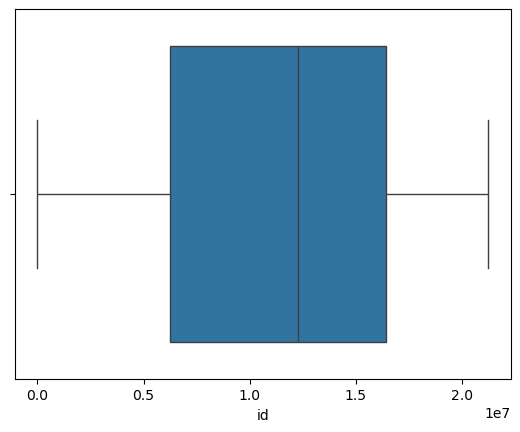

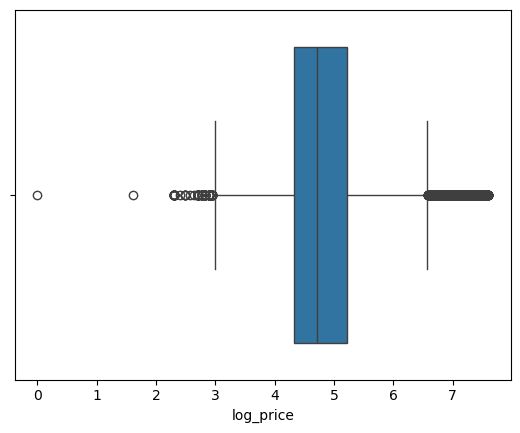

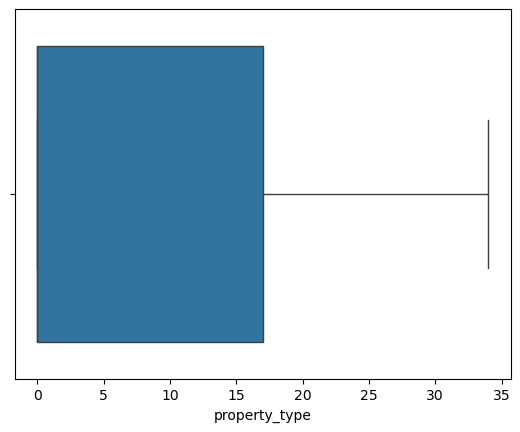

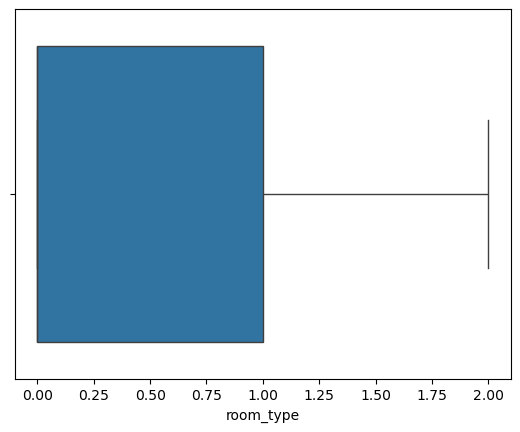

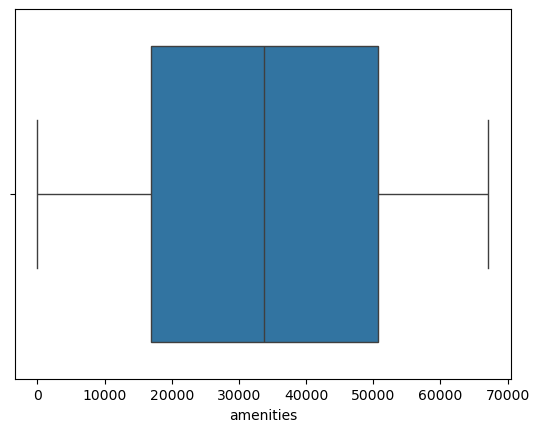

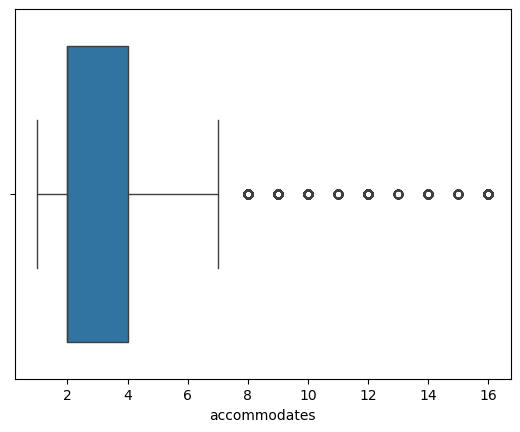

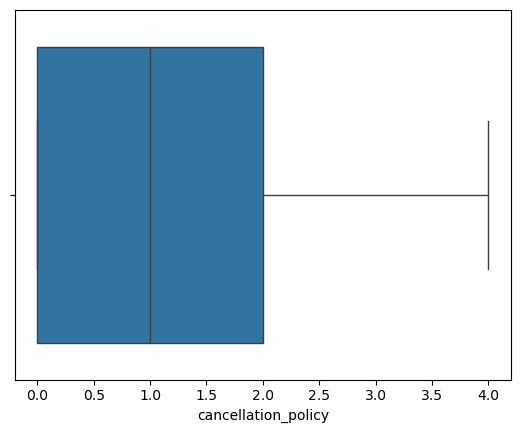

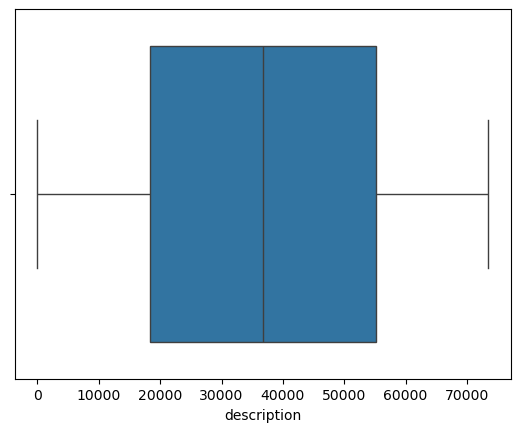

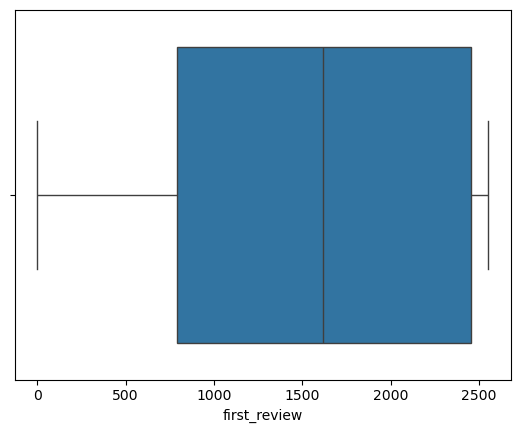

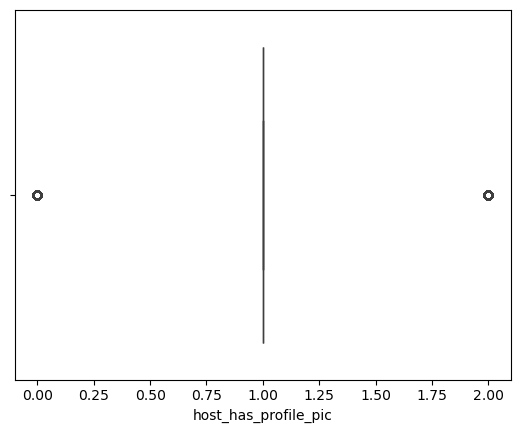

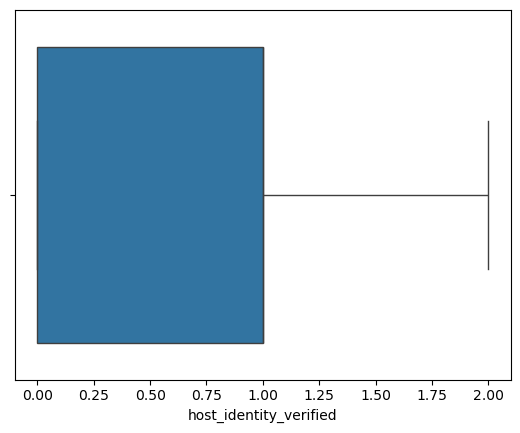

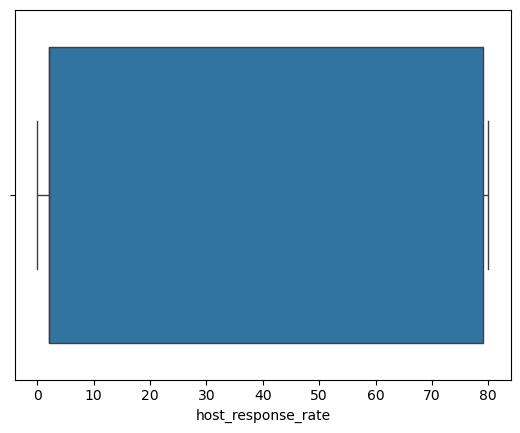

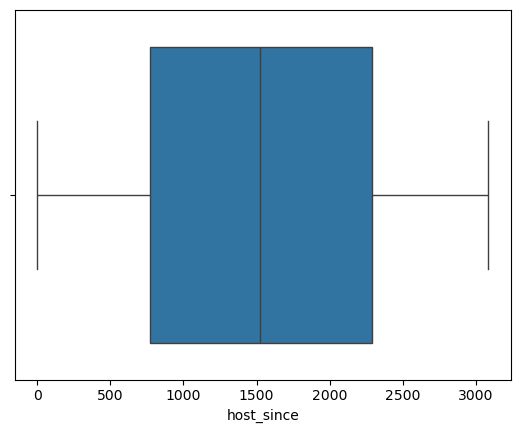

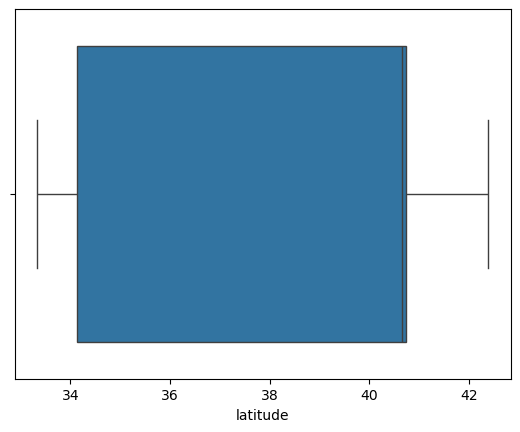

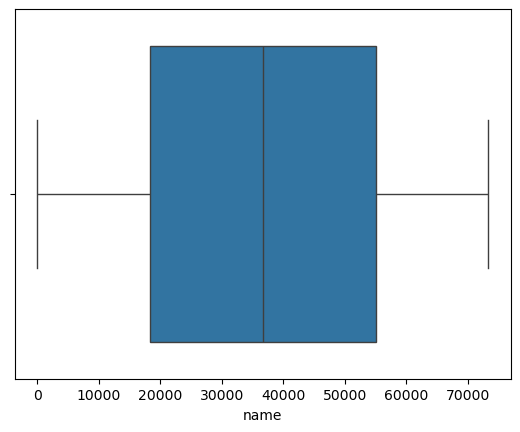

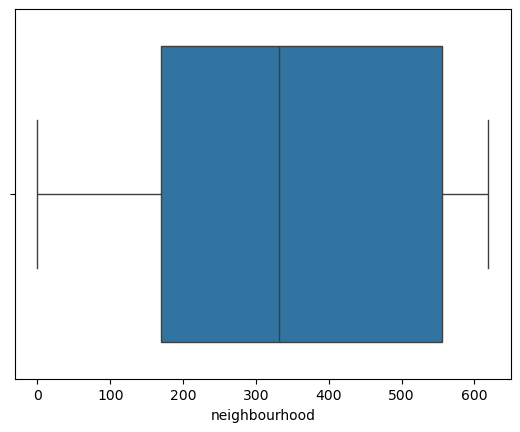

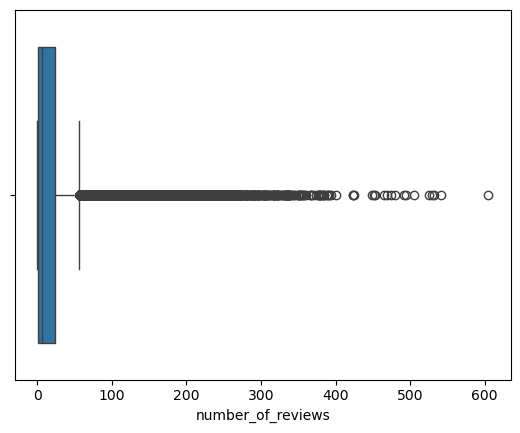

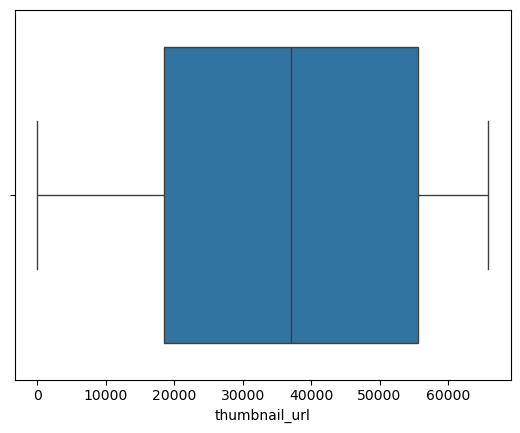

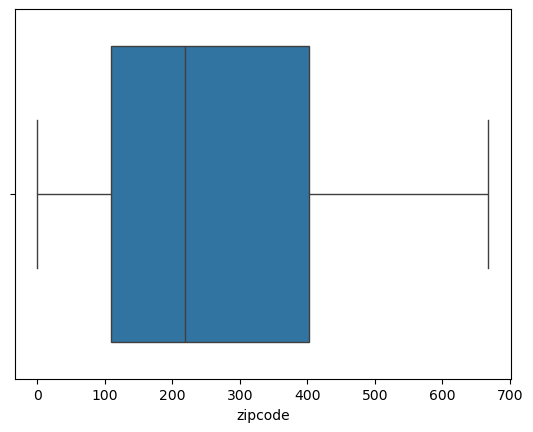

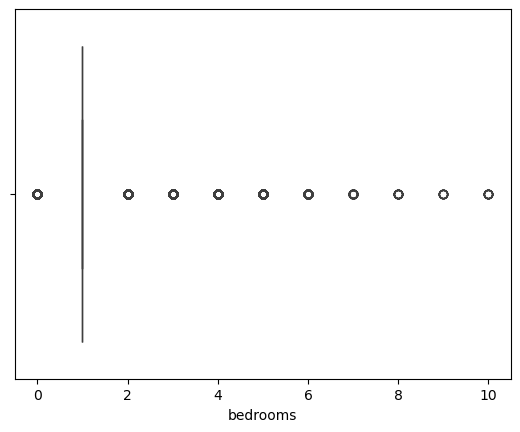

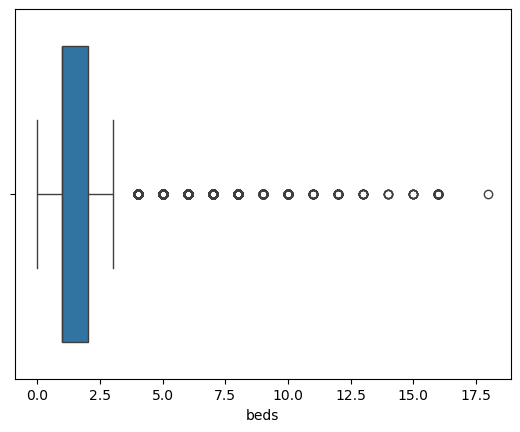

In [12]:
#to check the outliers
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

In [13]:
#removing the outliers from the data
Q1 = df[num_col].quantile(0.15)
Q3 = df[num_col].quantile(0.85)
IQR = Q3 - Q1
filtered_data = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(filtered_data)

             id  log_price  property_type  room_type  amenities  accommodates  \
0       6901257   5.010635              0          0       6142             3   
1       6304928   5.129899              0          0       6269             7   
2       7919400   4.976734              0          0      21345             5   
3      13418779   6.620073             17          0      38854             4   
5      12422935   4.442651              0          1      50079             2   
...         ...        ...            ...        ...        ...           ...   
74105    808802   4.248495             17          1      56858             2   
74106  14549287   4.605170              0          1      67121             1   
74107  13281809   5.043425              0          0      38652             4   
74108  18688039   5.220356              0          0      61276             5   
74109  17045948   5.273000              0          0      48796             2   

       bathrooms  bed_type 

In [14]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64871 entries, 0 to 74109
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64871 non-null  int64  
 1   log_price               64871 non-null  float64
 2   property_type           64871 non-null  int32  
 3   room_type               64871 non-null  int32  
 4   amenities               64871 non-null  int32  
 5   accommodates            64871 non-null  int64  
 6   bathrooms               64871 non-null  float64
 7   bed_type                64871 non-null  int32  
 8   cancellation_policy     64871 non-null  int32  
 9   cleaning_fee            64871 non-null  bool   
 10  city                    64871 non-null  int32  
 11  description             64871 non-null  int32  
 12  first_review            64871 non-null  int32  
 13  host_has_profile_pic    64871 non-null  int32  
 14  host_identity_verified  64871 non-null  int

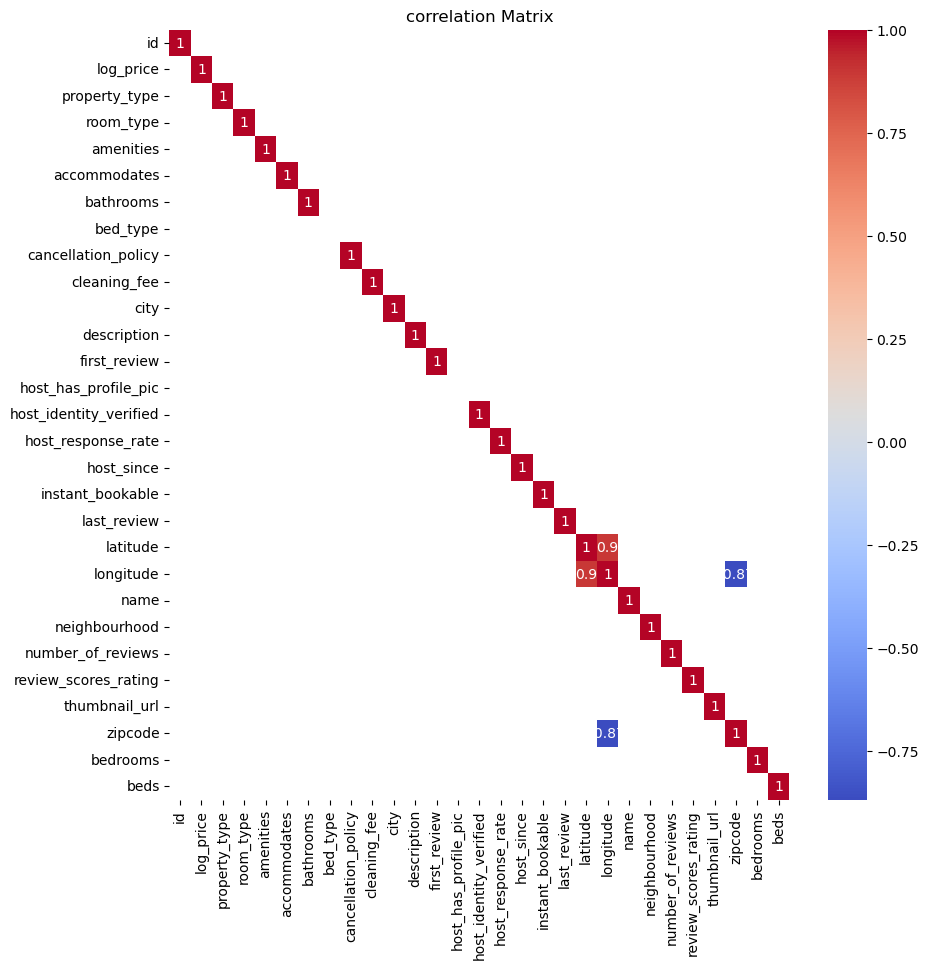

In [15]:
#correlation matrix
correlation_matrix=filtered_data.corr()
high_correlation = correlation_matrix[(correlation_matrix > 0.85) | (correlation_matrix < -0.85)]  # Only strong correlations

plt.figure(figsize=(10,10))
sns.heatmap(high_correlation,annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

In [16]:
#regression model
x=filtered_data.drop("log_price", axis=1)
y=filtered_data["log_price"]
print(x.shape)
print(y.shape)

(64871, 28)
(64871,)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48653, 28)
(16218, 28)
(48653,)
(16218,)


In [18]:
# Transforming the Training and testing data set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)  
X_test = scaler.transform(x_test)

In [19]:
#Applying linear Regression
simple_model=LinearRegression()
simple_model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=simple_model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'R^2 Score: {r2_score(y_test,y_pred)}')


Mean Squared Error: 0.22616491978807055
R^2 Score: 0.5065708278636545


In [21]:
#Applying Random forest model
from sklearn.ensemble import RandomForestRegressor

In [22]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tru

In [23]:
rf_model=RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [25]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predictions on training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate R-square
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score: {r2_test:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Testing MAE: {mae_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")

Training R² Score: 0.6906
Testing R² Score: 0.6307
Training MAE: 0.2838
Testing MAE: 0.3034
Training RMSE: 0.3784
Testing RMSE: 0.4114


In [27]:
# Creating a DataFrame to compare actual vs predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_test_pred})

# Displaying a few samples
print(comparison_df.head())

   Actual Price  Predicted Price
0      4.499810         3.968161
1      5.241747         5.340122
2      4.276666         4.251975
3      6.214608         4.353899
4      5.003946         5.142014


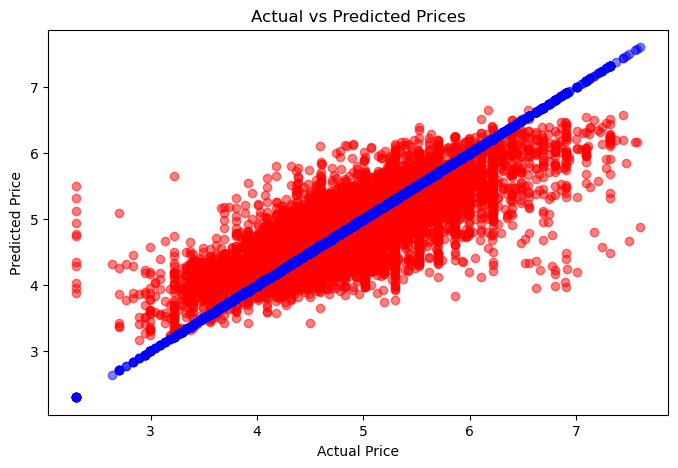

In [29]:
# Scatter plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Predicted Price')  
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Price') 
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

Conclusion:
1. Location and Property Type Matter – The model revealed that a property's location and type are significant factors in determining its price.
2. Amenities Influence Pricing – Listings with more amenities tend to have higher prices, indicating that hosts should highlight these features.
3. Data Cleaning Improves Accuracy – Handling missing values, encoding categorical features, and removing outliers significantly improved model performance.
4. Random Forest Performed Best – The Random Forest Regressor provided the most accurate predictions, making it a reliable model for Airbnb hosts to optimise their pricing strategies.
5. From the correlation matrix, the features that contribute more to log_price are accommodations, bedrooms, bathrooms, cleaning fee, property type, and room type. Also, the features with weak or no correlation are description, name, first review, last review, host identity, and host has profile pic.
6. It is clear from the correlation matrix that the relationship between the variables is not linear, and random forest works best for non-linear data.
7. Random Forest also handled the missing data well. Also, it works best if the data is both numerical as well as categorical.


In [ ]:
Video link:
https://drive.google.com/file/d/1UJO_8tW_z26PK7Ivg8PTcGLRqldqYT6R/view?usp=drive_link 